# Work with DAQ data through SpecTcl
This notebook demonstrates:

* How to reach the spectra data through SpecTcl server, and do the data analysis.
* Work with Spectrum class to get spectral info, interface to other HLA.
* Data from multiple SpecTcl servers could be integrated into the same analysis environment.
* Work with other Python packages.

Tong Zhang

2021-06-04 (rev 2021-07-14)

## Preparation of SpecTcl server(s)

Please refer to the section regarding SpecTcl shown in the file develop-vmphy0-v8.pdf, in which a server at localhost:8000 should be established for the clients.

In this notebook, two servers at port 8000 and 8001 has been started up, respectively.

### What is **PySpecTcl**
The project **pyspectcl** was created to handle all the data communication between Python client (local) and SpecTcl server (remote).

* Request data from remote
* Data normalization
* Spectrum class for introspection
* Common API for data pre-processing

### How to install
In virtualbox appliance: develop-vmphy0-v7 and v8, requires version of SpecTcl >= 5.4-000.
```
sudo apt update
sudo apt install python3-pyspectcl spectcl
```

In [1]:
import spectcl
spectcl.info()

PySpecTcl (v0.3.0): Python interface to SpecTcl REST server.
Contact: Tong Zhang <zhangt@frib.msu.edu>


### Work with PySpecTcl: set up client

In [2]:
from spectcl.client import DataClient

In [3]:
data_client = DataClient()

In [4]:
# by default the client is hooked to localhost at port 8000
data_client

[Data Client] SpecTcl REST Service on: http://127.0.0.1:8000/spectcl/spectrum

In [5]:
# But could be re-configured
data_client.base_url = "http://127.0.0.1"
data_client.port = 8001
data_client

[Data Client] SpecTcl REST Service on: http://127.0.0.1:8001/spectcl/spectrum

In [6]:
# Switch port back to 8000
data_client.port = 8000
data_client

[Data Client] SpecTcl REST Service on: http://127.0.0.1:8000/spectcl/spectrum

## Work with PySpectcl: data of spectra

In [7]:
# List all defined spectra
data_client.list()

,Type,Parameters,Axes,ChanType
Name,,,,
ctl::fp.ge.e,1,[a1900.fp.ge.e],"[{'low': 0.0, 'high': 8192.0, 'bins': 8192}]",word
ctl::fp.ge.e_cal,1,[a1900.fp.ge.e_cal],"[{'low': 0.0, 'high': 4000.0, 'bins': 4000}]",word
ctl::fp.ge.t,1,[a1900.fp.ge.t],"[{'low': 0.0, 'high': 32768.0, 'bins': 32768}]",word
ctl::fp.pin.dE,1,[a1900.fp.pin.dE],"[{'low': 0.0, 'high': 500.0, 'bins': 1000}]",word
ctl::fp.pin.e,1,[a1900.fp.pin.e],"[{'low': 0.0, 'high': 8192.0, 'bins': 8192}]",word
...,...,...,...,...
trk::i2.b,1,[a1900.i2.b],"[{'low': -50.0, 'high': 50.0, 'bins': 200}]",word
trk::i2.b_vs_y,2,"[a1900.i2.y, a1900.i2.b]","[{'low': -50.0, 'high': 50.0, 'bins': 200}, {'...",word
trk::i2.x,1,[a1900.i2.x],"[{'low': -200.0, 'high': 200.0, 'bins': 200}]",word


In [8]:
# Search spectra with wildcard string pattern
data_client.list(filter='*pid*tof*')

,Type,Parameters,Axes,ChanType
Name,,,,
pid::fp.pin.dE_vs_tof.i2n,2,"[a1900.tof.i2n, a1900.fp.pin.dE]","[{'low': 0.0, 'high': 100.0, 'bins': 1000}, {'...",word
pid::fp.pin.dE_vs_tof.i2s,2,"[a1900.tof.i2s, a1900.fp.pin.dE]","[{'low': 0.0, 'high': 100.0, 'bins': 1000}, {'...",word
pid::fp.pin.dE_vs_tof.rf1,2,"[a1900.tof.rf1, a1900.fp.pin.dE]","[{'low': 0.0, 'high': 100.0, 'bins': 1000}, {'...",word
pid::fp.pin.dE_vs_tof.rf1!FPslits,2,"[a1900.tof.rf1, a1900.fp.pin.dE]","[{'low': 0.0, 'high': 100.0, 'bins': 1000}, {'...",word
pid::fp.pin.dE_vs_tof.rf1cor,2,"[a1900.tof.rf1cor, a1900.fp.pin.dE]","[{'low': 0.0, 'high': 100.0, 'bins': 1000}, {'...",word
pid::fp.pin.dE_vs_tof.rf2,2,"[a1900.tof.rf2, a1900.fp.pin.dE]","[{'low': 0.0, 'high': 100.0, 'bins': 1000}, {'...",word
pid::fp.pin.dE_vs_tof.rf2!FPslits,2,"[a1900.tof.rf2, a1900.fp.pin.dE]","[{'low': 0.0, 'high': 100.0, 'bins': 1000}, {'...",word
pid::fp.pin.dE_vs_tof.rf2cor,2,"[a1900.tof.rf2cor, a1900.fp.pin.dE]","[{'low': 0.0, 'high': 100.0, 'bins': 1000}, {'...",word
pid::fp.pin.e_vs_tof.rf1,2,"[a1900.tof.rf1, a1900.fp.pin.e]","[{'low': 0.0, 'high': 100.0, 'bins': 1000}, {'...",word


In [9]:
# Get the spectral data by spectrum name
data_client.contents('pid::fp.pin.dE_vs_tof.i2n')

,a1900.tof.i2n,a1900.fp.pin.dE,count
0,0,13,6132
1,0,14,315
2,0,15,31
3,0,16,2
4,0,17,38
...,...,...,...
314,0,329,2
315,0,330,1
316,0,332,1
317,0,335,1


## Work with PySpectcl: data of gates

In [10]:
from spectcl.client import GateClient

In [11]:
gate_client = GateClient()
gate_client

[Data Client] SpecTcl REST Service on: http://127.0.0.1:8000/spectcl/gate

In [12]:
# List all defined gates
gate_client.list()

,Type,Parameters,Low,High,Points,Gates,Desc
Name,,,,,,,
FPslits,s,[a1900.fp.x],-5.5,5.5,NaN,NaN,Slice
Se-72 line,F,NaN,NaN,NaN,NaN,NaN,False
Z=15,F,NaN,NaN,NaN,NaN,NaN,False
Z=20,F,NaN,NaN,NaN,NaN,NaN,False
Z=30,F,NaN,NaN,NaN,NaN,NaN,False
Z=34,F,NaN,NaN,NaN,NaN,NaN,False
band_006,F,NaN,NaN,NaN,NaN,NaN,False
expecteddE,b,"[a1900.tof.rf1, a1900.fp.pin.dE]",NaN,NaN,"[{'x': 0.0, 'y': 77.07708}, {'x': 89.98999, 'y...",NaN,Band
foi,+,NaN,NaN,NaN,NaN,"[foiL, foiR]",Or


In [13]:
# Search gates with wildcard string pattern
gate_client.list(pattern="*foi*")

,Type,Gates,Parameters,Points,Desc
Name,,,,,
foi,+,"[foiL, foiR]",NaN,NaN,Or
foiL,c,NaN,"[a1900.tof.rf1, a1900.fp.pin.dE]","[{'x': 12.112112, 'y': 84.084084}, {'x': 16.11...",Contour
foiR,c,NaN,"[a1900.tof.rf1, a1900.fp.pin.dE]","[{'x': 52.452454, 'y': 81.581581}, {'x': 55.75...",Contour


In [14]:
gate_client.list(pattern="*foi*").loc['foiL']

Type                                                          c
Gates                                                       NaN
Parameters                     [a1900.tof.rf1, a1900.fp.pin.dE]
Points        [{'x': 12.112112, 'y': 84.084084}, {'x': 16.11...
Desc                                                    Contour
Name: foiL, dtype: object

## Work with PySpectcl: gate application

In [15]:
from spectcl.client import GateApplyClient
gate_apply_client = GateApplyClient()

In [16]:
gate_apply_client.list(pattern="ctl::fp.ge.e*")

,gate,desc
spectrum,,
ctl::fp.ge.e,foi,foi


In [17]:
gate_apply_client.list()

,gate,desc
spectrum,,
ctl::fp.ge.e,foi,foi
ctl::fp.ge.e_cal,foi,foi
ctl::fp.ge.t,foi,foi
ctl::fp.pin.dE,-TRUE-,ungated
ctl::fp.pin.e,-TRUE-,ungated
...,...,...
trk::i2.b,-TRUE-,ungated
trk::i2.b_vs_y,-TRUE-,ungated
trk::i2.x,-TRUE-,ungated


### Set up a client to SpecTcl server 

In [5]:
from spectcl.client import Client
client = Client()

In [6]:
client

[SpecTcl Client] to http://127.0.0.1:8000/spectcl

In [7]:
# But could be re-configured
client.base_url = "http://127.0.0.1"
client.port = 8001
client

[SpecTcl Client] to http://127.0.0.1:8001/spectcl

In [8]:
# Switch port back to 8000
client.port = 8000
client

[SpecTcl Client] to http://127.0.0.1:8000/spectcl

### List all spectra

In [9]:
client.list('spectrum')

,Type,Parameters,Axes,ChanType,Gate
Name,,,,,
ctl::fp.ge.e,1,[a1900.fp.ge.e],"[{'low': 0.0, 'high': 8192.0, 'bins': 8192}]",word,foi
ctl::fp.ge.e_cal,1,[a1900.fp.ge.e_cal],"[{'low': 0.0, 'high': 4000.0, 'bins': 4000}]",word,foi
ctl::fp.ge.t,1,[a1900.fp.ge.t],"[{'low': 0.0, 'high': 32768.0, 'bins': 32768}]",word,foi
ctl::fp.pin.dE,1,[a1900.fp.pin.dE],"[{'low': 0.0, 'high': 500.0, 'bins': 1000}]",word,ungated
ctl::fp.pin.e,1,[a1900.fp.pin.e],"[{'low': 0.0, 'high': 8192.0, 'bins': 8192}]",word,ungated
...,...,...,...,...,...
trk::i2.b,1,[a1900.i2.b],"[{'low': -50.0, 'high': 50.0, 'bins': 200}]",word,ungated
trk::i2.b_vs_y,2,"[a1900.i2.y, a1900.i2.b]","[{'low': -50.0, 'high': 50.0, 'bins': 200}, {'...",word,ungated
trk::i2.x,1,[a1900.i2.x],"[{'low': -200.0, 'high': 200.0, 'bins': 200}]",word,ungated


### List all Gates

In [10]:
client.list('gate')

,Type,Parameters,Low,High,Points,Gates,Desc
Name,,,,,,,
FPslits,s,[a1900.fp.x],-5.5,5.5,NaN,NaN,Slice
Se-72 line,F,NaN,NaN,NaN,NaN,NaN,False
Z=15,F,NaN,NaN,NaN,NaN,NaN,False
Z=20,F,NaN,NaN,NaN,NaN,NaN,False
Z=30,F,NaN,NaN,NaN,NaN,NaN,False
Z=34,F,NaN,NaN,NaN,NaN,NaN,False
band_006,F,NaN,NaN,NaN,NaN,NaN,False
expecteddE,b,"[a1900.tof.rf1, a1900.fp.pin.dE]",NaN,NaN,"[{'x': 0.0, 'y': 77.07708}, {'x': 89.98999, 'y...",NaN,Band
foi,+,NaN,NaN,NaN,NaN,"[foiL, foiR]",Or


In [8]:
sname = 'pid::fp.pin.dE_vs_tof.rf2!FPslits'
sp = client.get_spectrum(sname)

In [9]:
sp.gate

Type                     s
Parameters    [a1900.fp.x]
Low                   -5.5
High                   5.5
Points                 NaN
Gates                  NaN
Desc                 Slice
Name: FPslits, dtype: object

In [10]:
sname1 = 'pid::fp.pin.dE_vs_tof.rf2'
sp1 = client.get_spectrum(sname1)

In [11]:
sp1.gate

Type             T
Parameters     NaN
Low            NaN
High           NaN
Points         NaN
Gates          NaN
Desc          True
Name: truegate, dtype: object

In [12]:
sp1.gate = 'truegate'

Applied truegate to pid::fp.pin.dE_vs_tof.rf2


In [13]:
sp.gate = 'FPslits'

Applied FPslits to pid::fp.pin.dE_vs_tof.rf2!FPslits


In [14]:
sp.gate

Type                     s
Parameters    [a1900.fp.x]
Low                   -5.5
High                   5.5
Points                 NaN
Gates                  NaN
Desc                 Slice
Name: FPslits, dtype: object

In [15]:
client.list('spectrum', filter=sp.name)

,Type,Parameters,Axes,ChanType,Gate
Name,,,,,
pid::fp.pin.dE_vs_tof.rf2!FPslits,2,"[a1900.tof.rf2, a1900.fp.pin.dE]","[{'low': 0.0, 'high': 100.0, 'bins': 1000}, {'...",word,FPslits


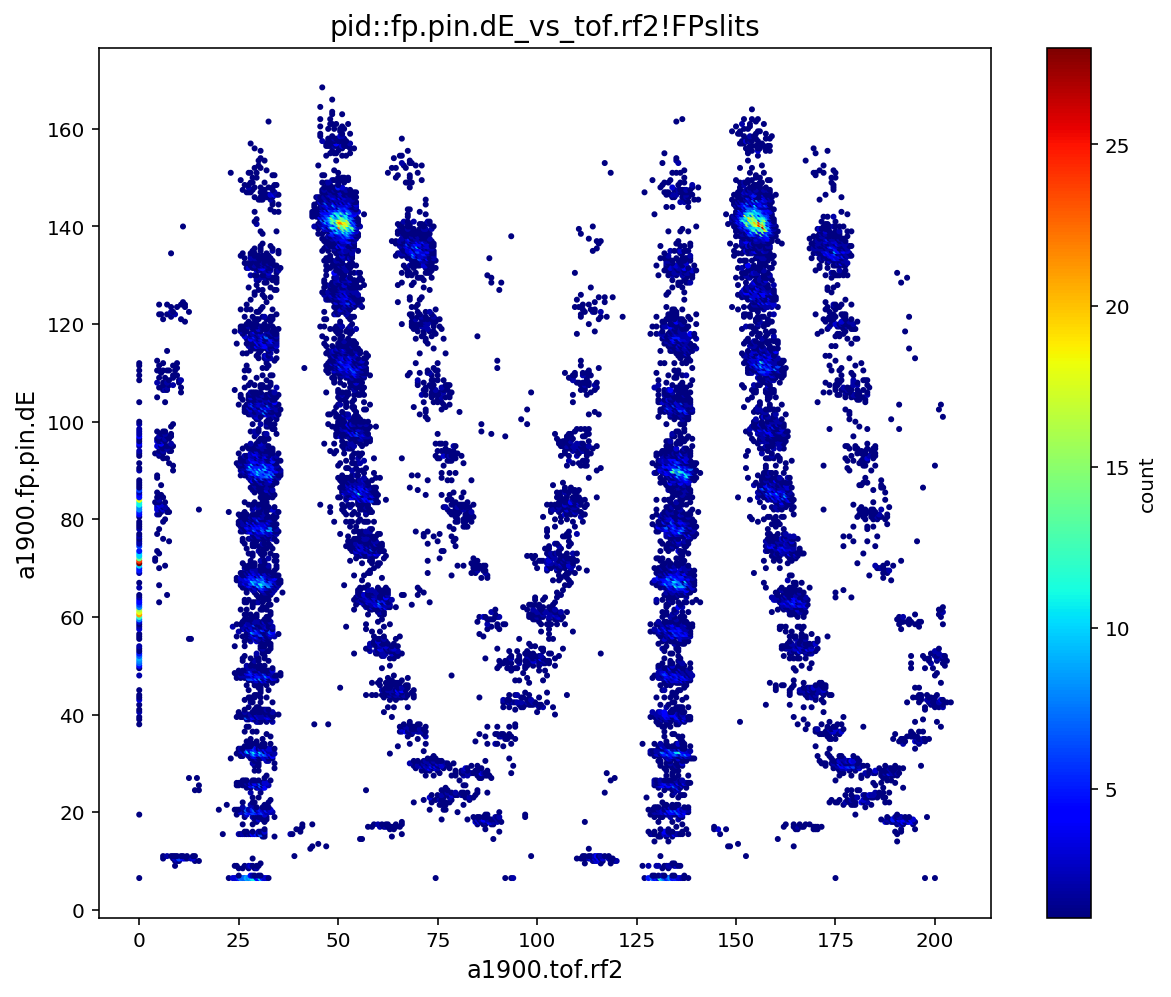

In [36]:
sp.plot()

In [20]:
sp.get_data()

,a1900.tof.rf2,a1900.fp.pin.dE,count
0,0.0,6.5,1
1,22.5,6.5,1
2,23.5,6.5,3
3,24.0,6.5,3
4,24.5,6.5,3
...,...,...,...
10005,48.5,163.5,1
10006,154.0,164.0,1
10007,45.5,164.5,1
10008,48.5,166.0,1


## Work with Spectrum

``Spectrum`` is a dedicated class to encapsulate all the available information regarding one spectrum to a single entity, featuring useful API for info query and data pre-processing.

In [11]:
from spectcl.client import Client

In [12]:
client = Client()
client

[SpecTcl Client] to http://127.0.0.1:8000/spectcl

In [13]:
# Filter
client.list('spectrum', filter='*!*')

,Type,Parameters,Axes,ChanType,Gate
Name,,,,,
pid::fp.pin.dE_vs_tof.rf1!FPslits,2,"[a1900.tof.rf1, a1900.fp.pin.dE]","[{'low': 0.0, 'high': 100.0, 'bins': 1000}, {'...",word,ungated
pid::fp.pin.dE_vs_tof.rf2!FPslits,2,"[a1900.tof.rf2, a1900.fp.pin.dE]","[{'low': 0.0, 'high': 100.0, 'bins': 1000}, {'...",word,FPslits
pid::fp.pin.e_vs_tof.rf1!FPslits,2,"[a1900.tof.rf1, a1900.fp.pin.e]","[{'low': 0.0, 'high': 100.0, 'bins': 1000}, {'...",word,FPslits
pid::fp.pin.e_vs_tof.rf2!FPslits,2,"[a1900.tof.rf2, a1900.fp.pin.e]","[{'low': 0.0, 'high': 100.0, 'bins': 1000}, {'...",word,FPslits
trk::fp.x!foi,1,[a1900.fp.x],"[{'low': -50.0, 'high': 50.0, 'bins': 200}]",word,foi


In [14]:
# General filter
a = client.list('spectrum')
a[a['Gate'] != 'ungated']

,Type,Parameters,Axes,ChanType,Gate
Name,,,,,
ctl::fp.ge.e,1,[a1900.fp.ge.e],"[{'low': 0.0, 'high': 8192.0, 'bins': 8192}]",word,foi
ctl::fp.ge.e_cal,1,[a1900.fp.ge.e_cal],"[{'low': 0.0, 'high': 4000.0, 'bins': 4000}]",word,foi
ctl::fp.ge.t,1,[a1900.fp.ge.t],"[{'low': 0.0, 'high': 32768.0, 'bins': 32768}]",word,foi
pid::fp.pin.dE_vs_tof.rf2,2,"[a1900.tof.rf2, a1900.fp.pin.dE]","[{'low': 0.0, 'high': 100.0, 'bins': 1000}, {'...",word,truegate
pid::fp.pin.dE_vs_tof.rf2!FPslits,2,"[a1900.tof.rf2, a1900.fp.pin.dE]","[{'low': 0.0, 'high': 100.0, 'bins': 1000}, {'...",word,FPslits
pid::fp.pin.e_vs_tof.rf1!FPslits,2,"[a1900.tof.rf1, a1900.fp.pin.e]","[{'low': 0.0, 'high': 100.0, 'bins': 1000}, {'...",word,FPslits
pid::fp.pin.e_vs_tof.rf2!FPslits,2,"[a1900.tof.rf2, a1900.fp.pin.e]","[{'low': 0.0, 'high': 100.0, 'bins': 1000}, {'...",word,FPslits
trk::fp.x!foi,1,[a1900.fp.x],"[{'low': -50.0, 'high': 50.0, 'bins': 200}]",word,foi


In [16]:
# Get data as a Spectrum instance
sp1 = client.get_spectrum('trk::fp.a_vs_x')

In [17]:
sp1

,x,y,v
0,78,0,1
1,45,1,1
2,38,2,1
3,23,3,1
4,84,5,1
...,...,...,...
3470,133,201,1
3471,135,201,1
3472,156,201,1
3473,159,201,1


In [18]:
# Spectrum name
sp1.name

'trk::fp.a_vs_x'

In [19]:
# Data type
sp1.dtype

dtype('int16')

In [20]:
# Spectrum type
sp1.stype

'2D'

In [21]:
# Spectrum axes
sp1.axes

[{'low': -50.0, 'high': 50.0, 'bins': 200},
 {'low': -50.0, 'high': 50.0, 'bins': 200}]

In [22]:
# Parameters
sp1.parameters

['a1900.fp.x', 'a1900.fp.a']

In [23]:
# Get axes arraies in channel coordinate (not mapped)
sp1.get_axes_values(map=False)

[array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

In [24]:
# Get axes arraies in world coordinate (mapped)
sp1.get_axes_values()

[array([-50. , -49.5, -49. , -48.5, -48. , -47.5, -47. , -46.5, -46. ,
        -45.5, -45. , -44.5, -44. , -43.5, -43. , -42.5, -42. , -41.5,
        -41. , -40.5, -40. , -39.5, -39. , -38.5, -38. , -37.5, -37. ,
        -36.5, -36. , -35.5, -35. , -34.5, -34. , -33.5, -33. , -32.5,
        -32. , -31.5, -31. , -30.5, -30. , -29.5, -29. , -28.5, -28. ,
        -27.5, -27. , -26.5, -26. , -25.5, -25. , -24.5, -24. , -23.5,
        -23. , -22.5, -22. , -21.5, -21. , -20.5, -20. , -19.5, -19. ,
        -18.5, -18. , -17.5, -17. , -16.5, -16. , -15.5, -15. , -14.5,
        -14. , -13.5, -13. , -12.5, -12. , -11.5, -11. , -10.5, -10. ,
         -9.5,  -9. ,  -8.5,  -8. ,  -7.5,  -7. ,  -6.5,  -6. ,  -5.5,
         -5. ,  -4.5,  -4. ,  -3.5,  -3. ,  -2.5,  -2. ,  -1.5,  -1. ,
         -0.5,   0. ,   0.5,   1. ,   1.5,   2. ,   2.5,   3. ,   3.5,
          4. ,   4.5,   5. ,   5.5,   6. ,   6.5,   7. ,   7.5,   8. ,
          8.5,   9. ,   9.5,  10. ,  10.5,  11. ,  11.5,  12. ,  12.5,
      

In [25]:
# Get spectrum data in world coordinate
sp1.get_data()

,a1900.fp.x,a1900.fp.a,count
0,-11.0,-50.0,1
1,-27.5,-49.5,1
2,-31.0,-49.0,1
3,-38.5,-48.5,1
4,-8.0,-47.5,1
...,...,...,...
3470,16.5,50.5,1
3471,17.5,50.5,1
3472,28.0,50.5,1
3473,29.5,50.5,1


In [26]:
# Get spectrum data in channel coordinate
sp1.get_data(map=False, with_label=False)

,x,y,v
0,78,0,1
1,45,1,1
2,38,2,1
3,23,3,1
4,84,5,1
...,...,...,...
3470,133,201,1
3471,135,201,1
3472,156,201,1
3473,159,201,1


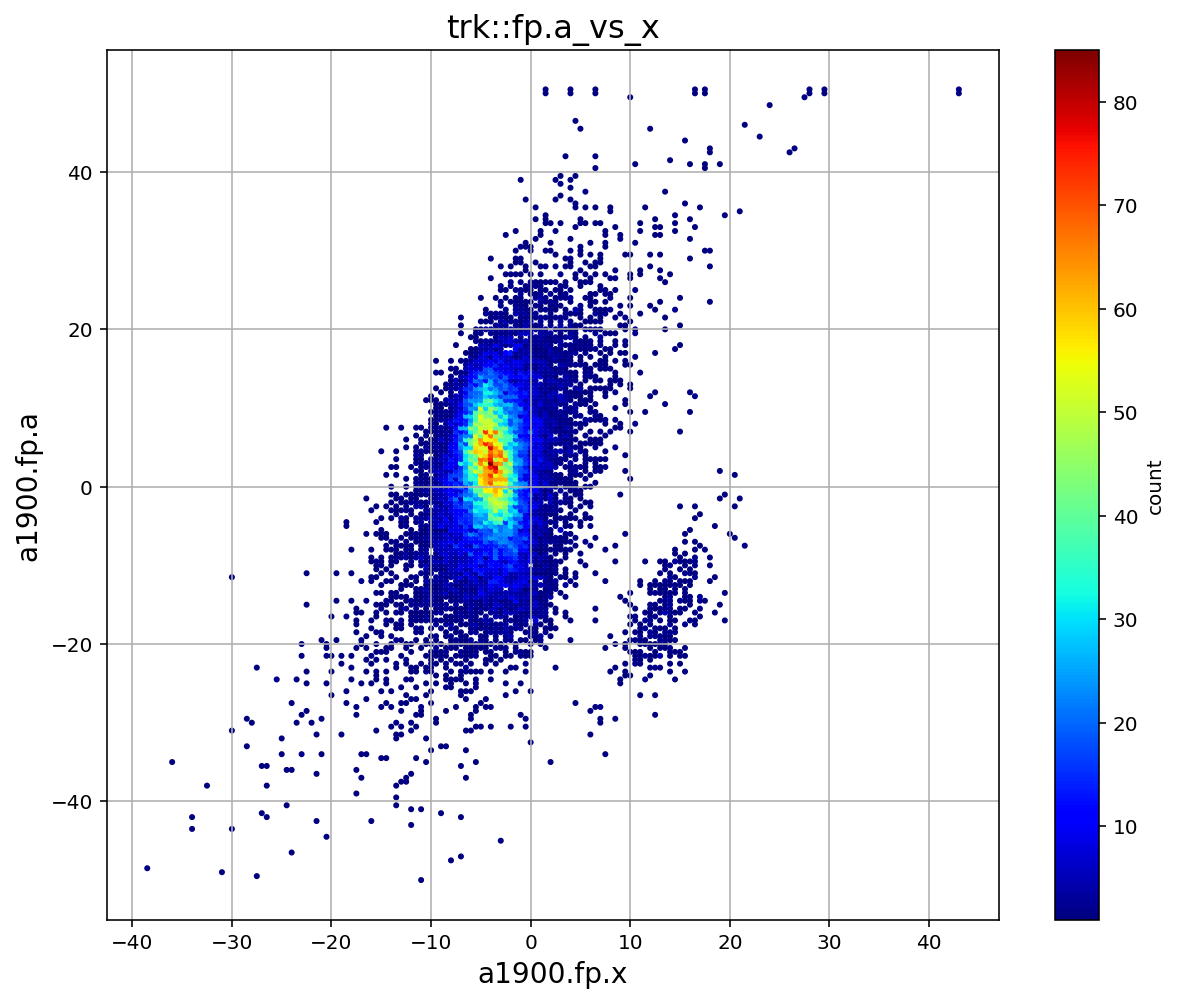

In [27]:
# Plot
sp1.plot(fontsize=14, grid=True)

In [29]:
# Get another 1D spectrum
sp2 = client.get_spectrum('trk::fp.x!foi')
print(f"Spectral type: {sp2.stype}, Parameters: {sp2.parameters}")

Spectral type: 1D, Parameters: ['a1900.fp.x']


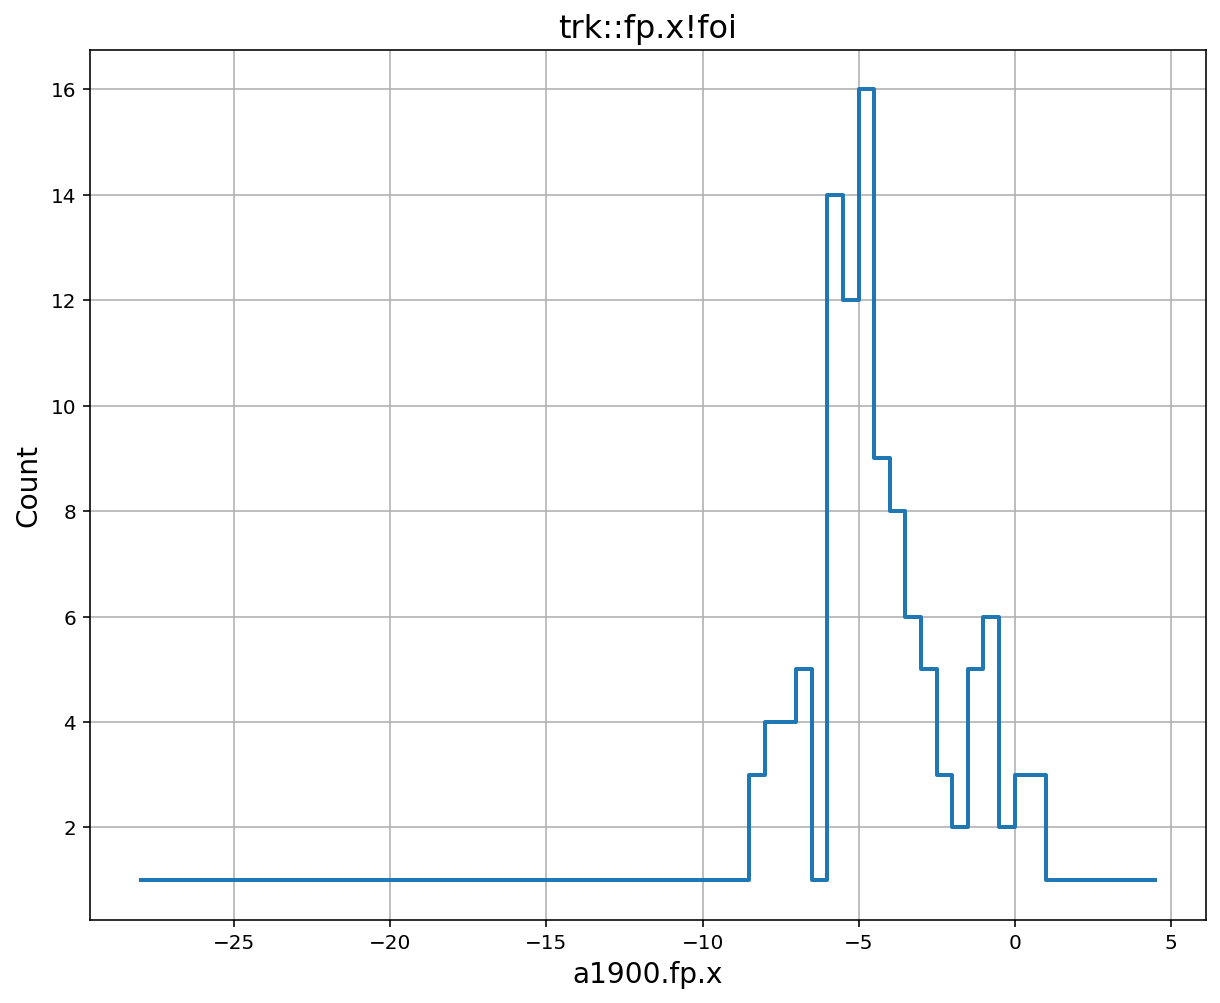

In [30]:
sp2.plot(grid=True, fontsize=14, legend=False, lw=2);

### Gate application

In [32]:
client.list('spectrum', filter='*!*')

,Type,Parameters,Axes,ChanType,Gate
Name,,,,,
pid::fp.pin.dE_vs_tof.rf1!FPslits,2,"[a1900.tof.rf1, a1900.fp.pin.dE]","[{'low': 0.0, 'high': 100.0, 'bins': 1000}, {'...",word,ungated
pid::fp.pin.dE_vs_tof.rf2!FPslits,2,"[a1900.tof.rf2, a1900.fp.pin.dE]","[{'low': 0.0, 'high': 100.0, 'bins': 1000}, {'...",word,FPslits
pid::fp.pin.e_vs_tof.rf1!FPslits,2,"[a1900.tof.rf1, a1900.fp.pin.e]","[{'low': 0.0, 'high': 100.0, 'bins': 1000}, {'...",word,FPslits
pid::fp.pin.e_vs_tof.rf2!FPslits,2,"[a1900.tof.rf2, a1900.fp.pin.e]","[{'low': 0.0, 'high': 100.0, 'bins': 1000}, {'...",word,FPslits
trk::fp.x!foi,1,[a1900.fp.x],"[{'low': -50.0, 'high': 50.0, 'bins': 200}]",word,foi


In [49]:
sp3 = client.get_spectrum('pid::fp.pin.dE_vs_tof.rf1')

In [50]:
# gate?
if sp3.gate is None:
    print(f"'{sp3.name}' is ungated")
else:
    print(f"'{sp3.name}' is gated with '{sp3.gate}'")

'pid::fp.pin.dE_vs_tof.rf1' is ungated


In [51]:
# Set gate
sp3.gate = 'FPslits'

Applied FPslits to pid::fp.pin.dE_vs_tof.rf1


In [52]:
sp3.gate

Type                     s
Parameters    [a1900.fp.x]
Low                   -5.5
High                   5.5
Points                 NaN
Gates                  NaN
Desc                 Slice
Name: FPslits, dtype: object

In [53]:
client.list('spectrum', filter='pid::fp.pin.dE_vs_tof.rf1*')

,Type,Parameters,Axes,ChanType,Gate
Name,,,,,
pid::fp.pin.dE_vs_tof.rf1,2,"[a1900.tof.rf1, a1900.fp.pin.dE]","[{'low': 0.0, 'high': 100.0, 'bins': 1000}, {'...",word,FPslits
pid::fp.pin.dE_vs_tof.rf1!FPslits,2,"[a1900.tof.rf1, a1900.fp.pin.dE]","[{'low': 0.0, 'high': 100.0, 'bins': 1000}, {'...",word,FPslits
pid::fp.pin.dE_vs_tof.rf1cor,2,"[a1900.tof.rf1cor, a1900.fp.pin.dE]","[{'low': 0.0, 'high': 100.0, 'bins': 1000}, {'...",word,ungated


## Interface to Allison-scanner app

Pre-processing the 2D spectrum of transverse phase space, i.e. `x` vs `x'`(`a`) or `y` vs `y'`(`b`), to interface the data with Allison-scanner app for emittance and Twiss parameter calculation.

Note:
* Fake voltage info is generated from x'.
* Ion species info is only used for mapping voltage to x' domain.
* Calculate normalized emittance from geometry emittance with given particle energy.

In [37]:
from spectcl.contrib import export_spectrum_for_allison

In [38]:
sp = data_client.get_spectrum('trk::fp.a_vs_x')

In [39]:
export_spectrum_for_allison('test.json', sp)
# Load the file into Allison Scanner app.

Exported spectrum to /home/tong/Dropbox/pyspectcl/doc/getting-started/test.json.


Normalized emittance is not reflecting the real data.
<img src="as-results.png" width="800" />

### Create another client hooking to another SpecTcl server

In [40]:
client1 = DataClient(port=8001)
client1

[Data Client] SpecTcl REST Service on: http://127.0.0.1:8001/spectcl/spectrum

In [41]:
spec_name = 'pid::fp.pin.dE_vs_tof.rf2'
sp2 = client1.get_spectrum(spec_name)

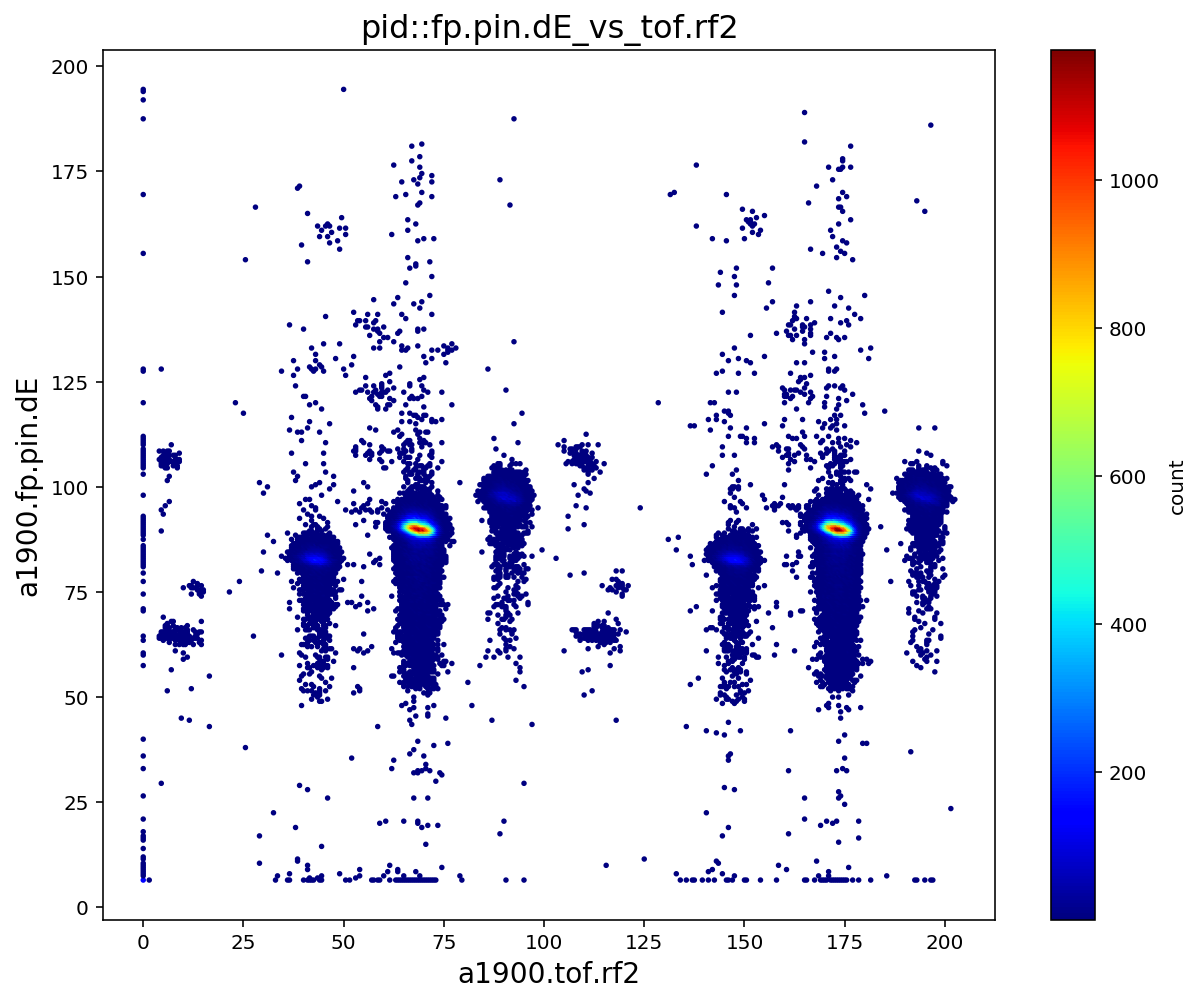

In [42]:
sp2.plot(s=3, fontsize=14)

### Advanced processing
e.g. use existing clustering algorithms to auto-cluster isotops.

In [96]:
from sklearn.mixture import BayesianGaussianMixture

In [97]:
from sklearn.mixture import BayesianGaussianMixture as BGMM
from matplotlib.patches import Ellipse
import matplotlib.pyplot as plt

def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))
        
def plot_gmm(gmm, X, label=True, ax=None, cmap='viridis', ms=10, ellipse_on=False, equal_axis=False):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=ms, cmap=cmap, zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=ms, zorder=2)
    if equal_axis:
        ax.axis('equal')
    
    if ellipse_on:
        w_factor = 0.2 / gmm.weights_.max()
        for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
            draw_ellipse(pos, covar, alpha=w * w_factor)

def cluster_fn(x_data_range, y_data_range, df, n_components, random_state=0, ms=5, cmap='jet', bayesian_on=True, covariance_type='full', **kws):
    xmin, xmax = x_data_range
    ymin, ymax = y_data_range
    df1 = df[(df.x < xmax) & (df.x > xmin) & (df.y < ymax) & (df.y > ymin)]
    X = np.vstack([df1.x.to_numpy(), df1.y.to_numpy()]).T
    if bayesian_on:
        gmm = BGMM(n_components=n_components, covariance_type=covariance_type, random_state=random_state, **kws)
    else:
        gmm = GMM(n_components=n_components, covariance_type=covariance_type, random_state=random_state, **kws)
    plot_gmm(gmm, X, ms=ms, cmap=cmap, ellipse_on=True)
    #plt.xlim(0, 400)
    #plt.ylim(0, 350)

In [98]:
data['x'] = data['a1900.tof.rf2']
data['y'] = data['a1900.fp.pin.dE']
data2 = data.loc[np.repeat(data.index.values, 5 * data['count'])]

/usr/lib/python3/dist-packages/sklearn/mixture/_base.py:263: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn('Initialization %d did not converge. '


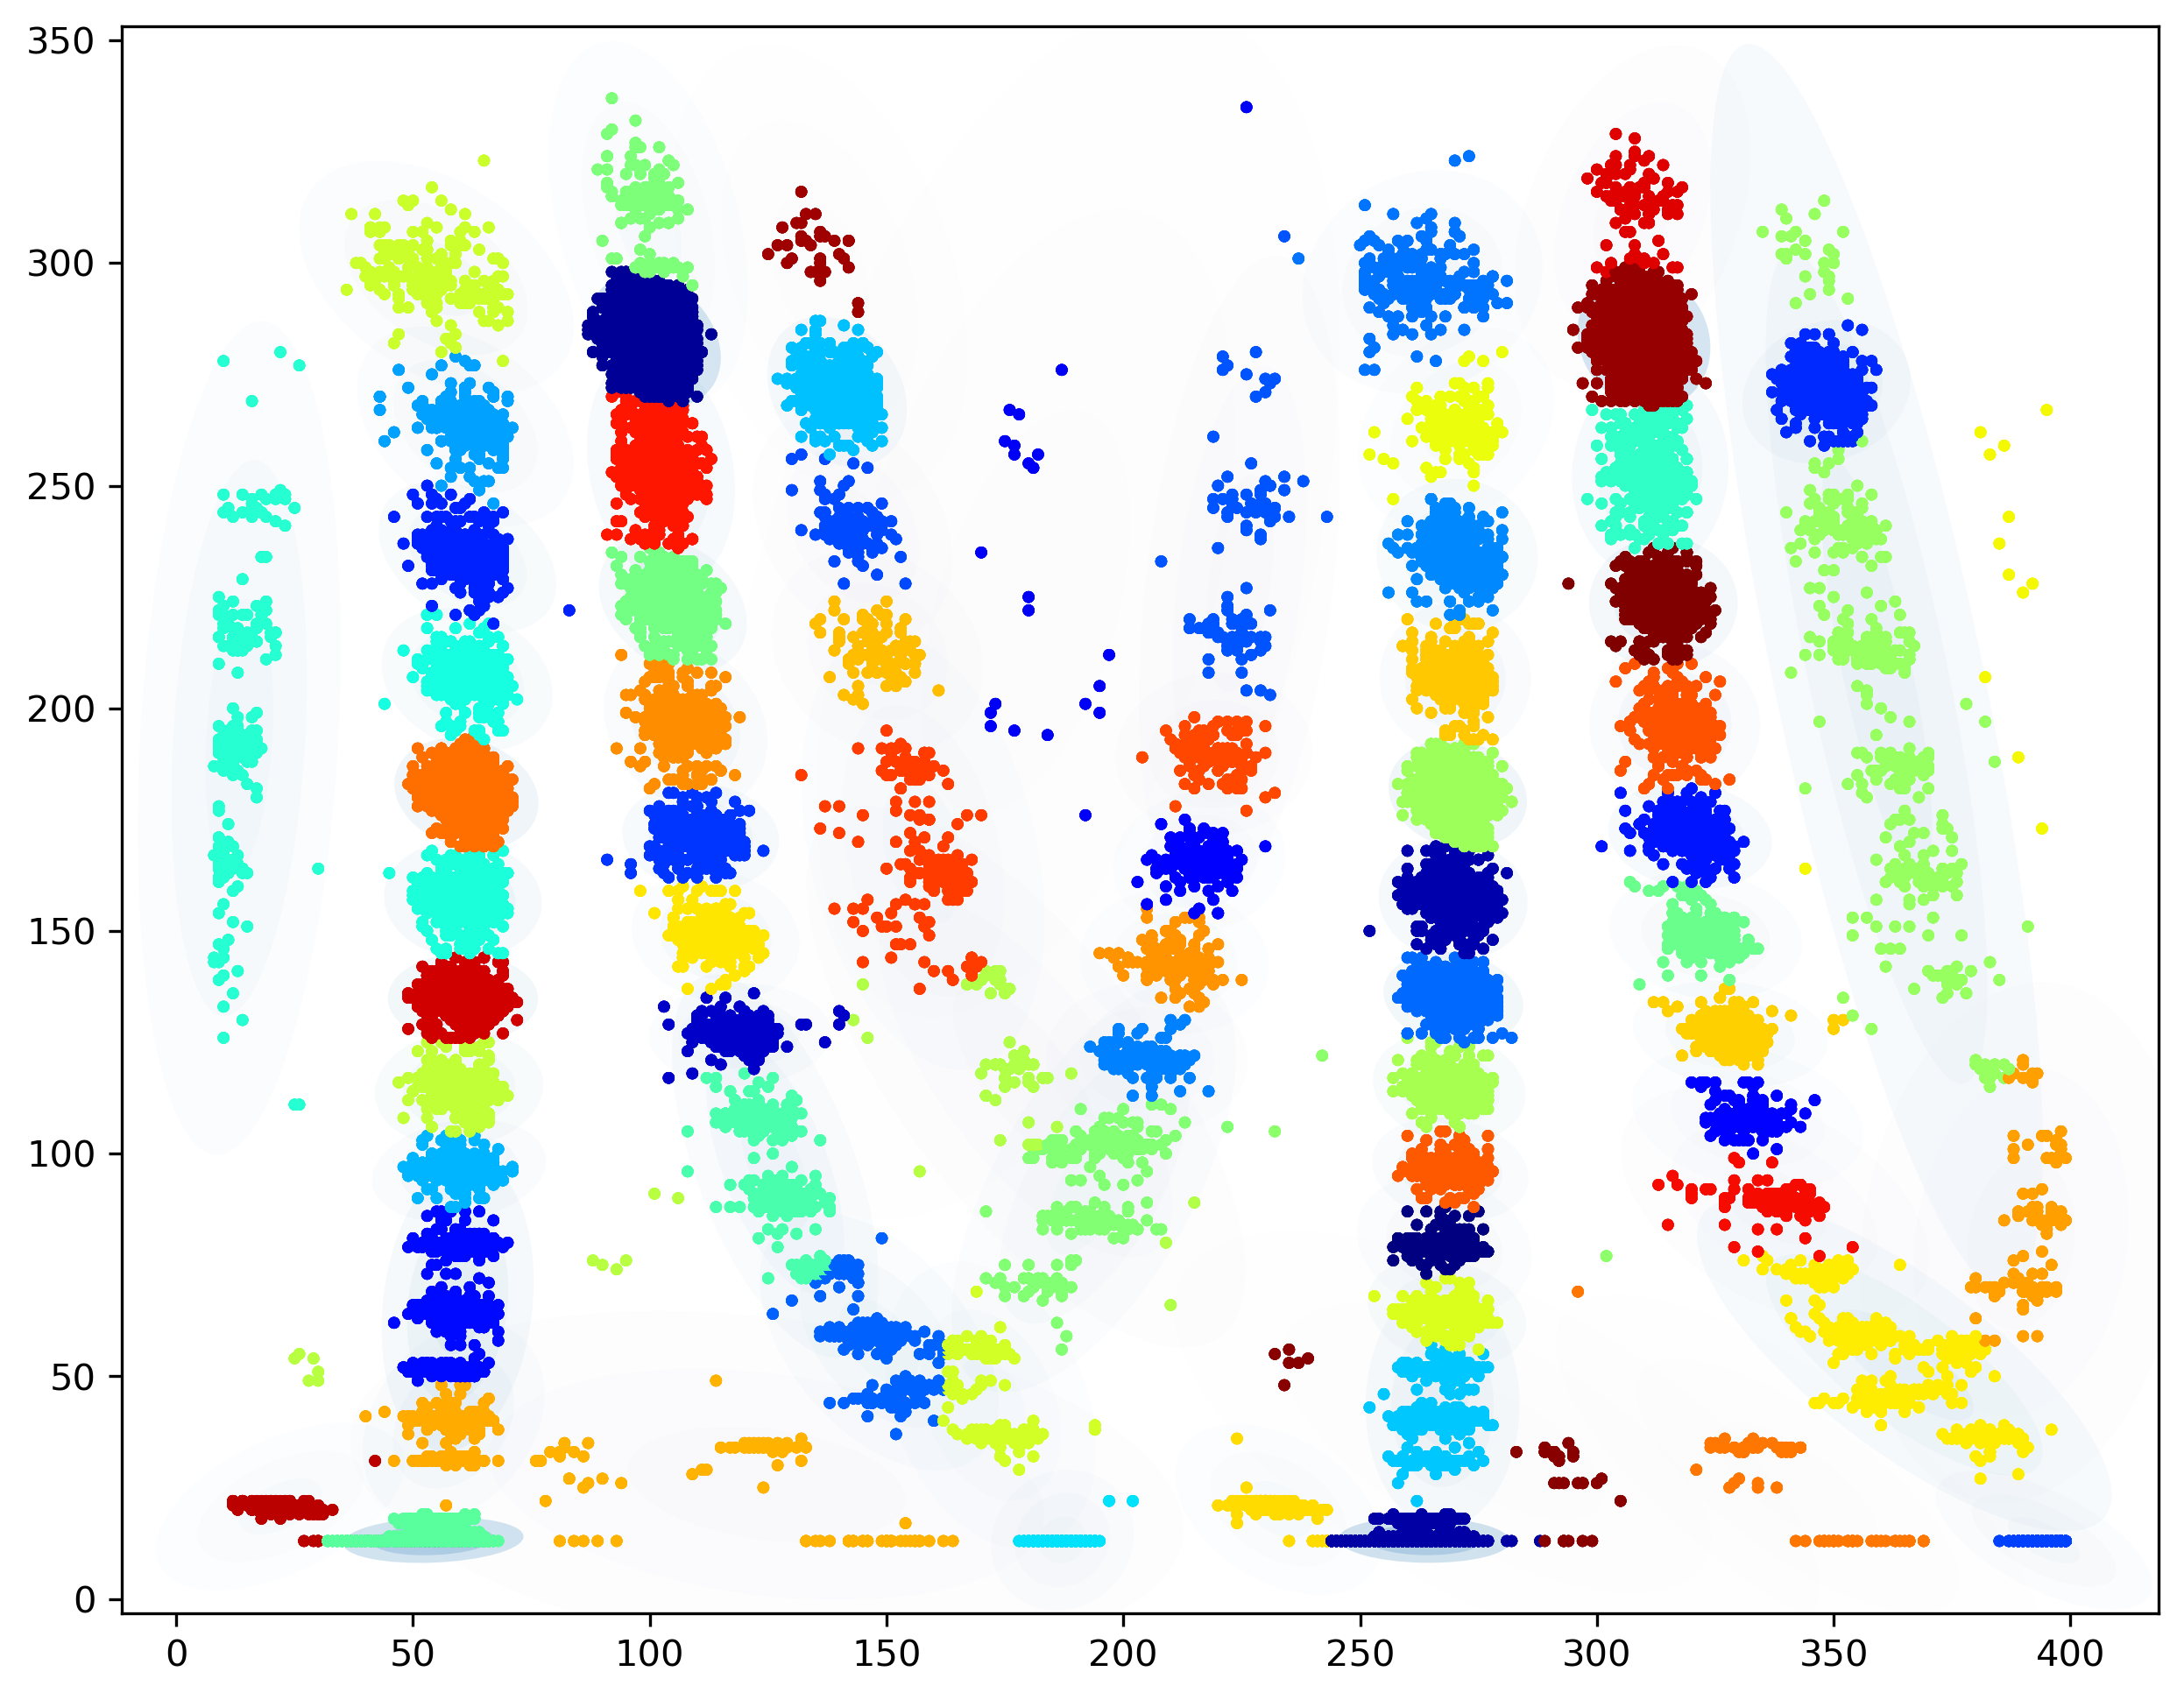

In [95]:
cluster_fn([0, 400], [0, 350], data2, 100, random_state=43, bayesian_on=True, covariance_type='full', ms=5)